In [349]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [350]:
ColumnNames = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
types = {"buildingwindowsfloatprocessed":1, "buildingwindowsnonfloatprocessed":2, "vehiclewindowsfloatprocessed":3, "vehiclewindowsnonfloatprocessed":4, "containers":5, "tableware":6, "headlamps":7}
types

{'buildingwindowsfloatprocessed': 1,
 'buildingwindowsnonfloatprocessed': 2,
 'vehiclewindowsfloatprocessed': 3,
 'vehiclewindowsnonfloatprocessed': 4,
 'containers': 5,
 'tableware': 6,
 'headlamps': 7}

In [351]:
dataset = pd.read_csv('glass.csv',names = ColumnNames, header = 0)

In [352]:
df = dataset.drop("Type", axis=1)
y = dataset["Type"]
print(y.value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


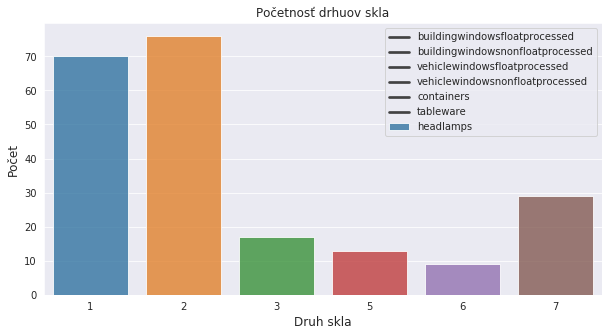

In [353]:
plt.figure(figsize=(10,5))
sns.barplot(y.value_counts().index,y.value_counts(), alpha=0.8)
plt.title('Početnosť drhuov skla')
plt.ylabel('Počet', fontsize=12)
plt.xlabel('Druh skla', fontsize=12)
plt.legend(types, loc='upper right')
plt.show()

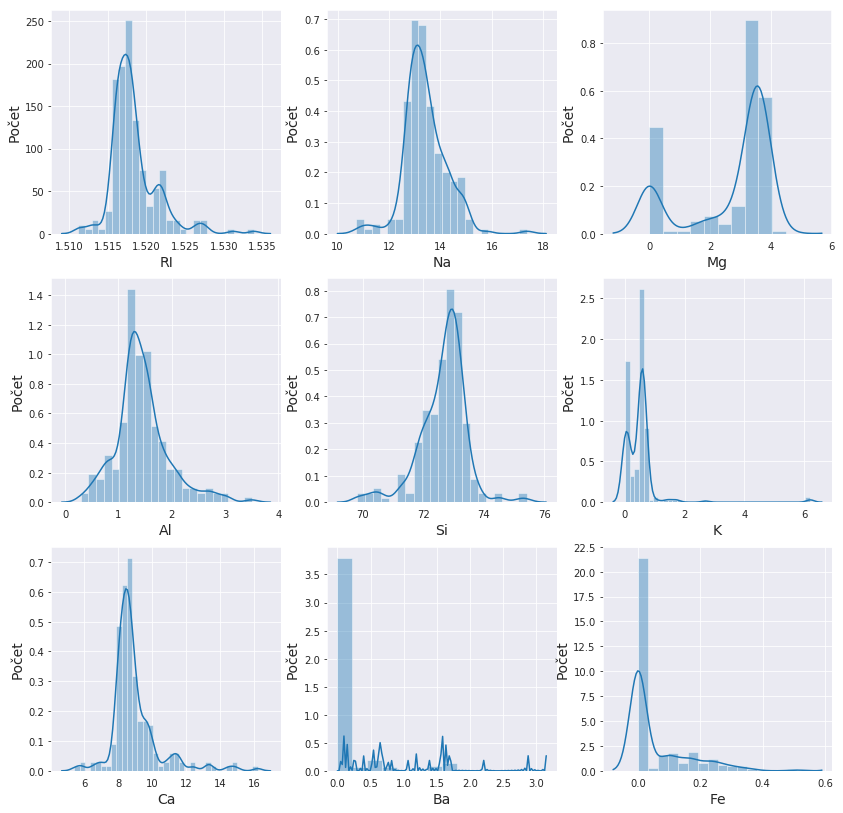

In [354]:

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.1, random_state = 42)

f, axes = plt.subplots(3,3,figsize=(14,14))
sns.set_style('darkgrid')
sns.distplot(dataset['RI'], ax = axes[0,0])
axes[0,0].set_xlabel('RI', fontsize=14)
axes[0,0].set_ylabel('Počet', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.distplot(dataset['Na'], ax = axes[0,1])
axes[0,1].set_xlabel('Na', fontsize=14)
axes[0,1].set_ylabel('Počet', fontsize=14)
axes[0,1].yaxis.tick_left()

sns.distplot(dataset['Mg'], ax = axes[0,2])
axes[0,2].set_xlabel('Mg', fontsize=14)
axes[0,2].set_ylabel('Počet', fontsize=14)
axes[0,2].yaxis.tick_left()

sns.distplot(dataset['Al'], ax = axes[1,0])
axes[1,0].set_xlabel('Al', fontsize=14)
axes[1,0].set_ylabel('Počet', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.distplot(dataset['Si'], ax = axes[1,1])
axes[1,1].set_xlabel('Si', fontsize=14)
axes[1,1].set_ylabel('Počet', fontsize=14)
axes[1,1].yaxis.tick_left()

sns.distplot(dataset['K'], ax = axes[1,2])
axes[1,2].set_xlabel('K', fontsize=14)
axes[1,2].set_ylabel('Počet', fontsize=14)
axes[1,2].yaxis.tick_left()

sns.distplot(dataset['Ca'], ax = axes[2,0])
axes[2,0].set_xlabel('Ca', fontsize=14)
axes[2,0].set_ylabel('Počet', fontsize=14)
axes[2,0].yaxis.tick_left()

sns.distplot(dataset['Ba'], ax = axes[2,1])
axes[2,1].set_xlabel('Ba', fontsize=14)
axes[2,1].set_ylabel('Počet', fontsize=14)
axes[2,1].yaxis.tick_left()

sns.distplot(dataset['Fe'], ax = axes[2,2])
axes[2,2].set_xlabel('Fe', fontsize=14)
axes[2,2].set_ylabel('Počet', fontsize=14)
axes[2,2].yaxis.tick_left()

plt.show()

In [355]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [356]:
print("Rozmery X_train: ",X_train.shape)
print("Rozmery X_test: ", X_test.shape)
print("Rozmery y_train: ",y_train.shape)
print("Rozmery y_test",y_test.shape)

Rozmery X_train:  (192, 9)
Rozmery X_test:  (22, 9)
Rozmery y_train:  (192,)
Rozmery y_test (22,)


In [357]:
sc_X = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [358]:
model = Sequential()
model.add(Dense(30, input_dim=9, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(8, activation = 'softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_categorical, validation_data=(X_test_scaled, y_test_categorical),batch_size = 100, epochs = 1300)
scores = model.evaluate(X_test_scaled, y_test_categorical)
scoresTrain = model.evaluate(X_train_scaled, y_train_categorical)

Train on 192 samples, validate on 22 samples
Epoch 1/1300
192/192 [==============================] - 3s 15ms/step - loss: 0.1016 - accuracy: 0.3542 - val_loss: 0.0999 - val_accuracy: 0.3636
Epoch 2/1300
192/192 [==============================] - 0s 349us/step - loss: 0.0988 - accuracy: 0.3542 - val_loss: 0.0988 - val_accuracy: 0.3636
Epoch 3/1300
192/192 [==============================] - 0s 249us/step - loss: 0.0964 - accuracy: 0.3542 - val_loss: 0.0986 - val_accuracy: 0.3636
Epoch 4/1300
192/192 [==============================] - 0s 158us/step - loss: 0.0948 - accuracy: 0.3542 - val_loss: 0.0986 - val_accuracy: 0.3636
Epoch 5/1300
192/192 [==============================] - 0s 184us/step - loss: 0.0941 - accuracy: 0.3542 - val_loss: 0.0987 - val_accuracy: 0.3636
Epoch 6/1300
192/192 [==============================] - 0s 323us/step - loss: 0.0935 - accuracy: 0.3542 - val_loss: 0.0988 - val_accuracy: 0.3636
Epoch 7/1300
192/192 [==============================] - 0s 325us/step - loss: 0.

192/192 [==============================] - 0s 236us/step - loss: 0.0701 - accuracy: 0.5781 - val_loss: 0.0762 - val_accuracy: 0.5000
Epoch 57/1300
192/192 [==============================] - 0s 165us/step - loss: 0.0700 - accuracy: 0.6094 - val_loss: 0.0693 - val_accuracy: 0.7273
Epoch 58/1300
192/192 [==============================] - 0s 400us/step - loss: 0.0688 - accuracy: 0.6094 - val_loss: 0.0678 - val_accuracy: 0.6364
Epoch 59/1300
192/192 [==============================] - 0s 212us/step - loss: 0.0694 - accuracy: 0.5312 - val_loss: 0.0688 - val_accuracy: 0.7273
Epoch 60/1300
192/192 [==============================] - 0s 215us/step - loss: 0.0683 - accuracy: 0.6354 - val_loss: 0.0723 - val_accuracy: 0.6364
Epoch 61/1300
192/192 [==============================] - 0s 180us/step - loss: 0.0691 - accuracy: 0.5990 - val_loss: 0.0703 - val_accuracy: 0.6818
Epoch 62/1300
192/192 [==============================] - 0s 136us/step - loss: 0.0683 - accuracy: 0.6354 - val_loss: 0.0668 - val_ac

Epoch 112/1300
192/192 [==============================] - 0s 208us/step - loss: 0.0653 - accuracy: 0.6302 - val_loss: 0.0596 - val_accuracy: 0.7273
Epoch 113/1300
192/192 [==============================] - 0s 282us/step - loss: 0.0656 - accuracy: 0.6094 - val_loss: 0.0592 - val_accuracy: 0.7273
Epoch 114/1300
192/192 [==============================] - 0s 251us/step - loss: 0.0651 - accuracy: 0.6250 - val_loss: 0.0621 - val_accuracy: 0.6818
Epoch 115/1300
192/192 [==============================] - 0s 231us/step - loss: 0.0655 - accuracy: 0.6354 - val_loss: 0.0608 - val_accuracy: 0.6818
Epoch 116/1300
192/192 [==============================] - 0s 297us/step - loss: 0.0650 - accuracy: 0.6250 - val_loss: 0.0587 - val_accuracy: 0.6818
Epoch 117/1300
192/192 [==============================] - 0s 249us/step - loss: 0.0657 - accuracy: 0.6146 - val_loss: 0.0599 - val_accuracy: 0.7273
Epoch 118/1300
192/192 [==============================] - 0s 394us/step - loss: 0.0647 - accuracy: 0.6302 - val_

192/192 [==============================] - 0s 200us/step - loss: 0.0635 - accuracy: 0.6146 - val_loss: 0.0586 - val_accuracy: 0.6818
Epoch 168/1300
192/192 [==============================] - 0s 259us/step - loss: 0.0638 - accuracy: 0.6354 - val_loss: 0.0554 - val_accuracy: 0.6818
Epoch 169/1300
192/192 [==============================] - 0s 340us/step - loss: 0.0651 - accuracy: 0.5885 - val_loss: 0.0547 - val_accuracy: 0.7273
Epoch 170/1300
192/192 [==============================] - 0s 346us/step - loss: 0.0644 - accuracy: 0.6094 - val_loss: 0.0613 - val_accuracy: 0.6818
Epoch 171/1300
192/192 [==============================] - 0s 495us/step - loss: 0.0643 - accuracy: 0.6302 - val_loss: 0.0547 - val_accuracy: 0.6818
Epoch 172/1300
192/192 [==============================] - 0s 318us/step - loss: 0.0636 - accuracy: 0.6042 - val_loss: 0.0531 - val_accuracy: 0.7273
Epoch 173/1300
192/192 [==============================] - 0s 149us/step - loss: 0.0642 - accuracy: 0.5885 - val_loss: 0.0574 - 

192/192 [==============================] - 0s 133us/step - loss: 0.0619 - accuracy: 0.6302 - val_loss: 0.0513 - val_accuracy: 0.7273
Epoch 223/1300
192/192 [==============================] - 0s 200us/step - loss: 0.0637 - accuracy: 0.5885 - val_loss: 0.0524 - val_accuracy: 0.7273
Epoch 224/1300
192/192 [==============================] - 0s 165us/step - loss: 0.0619 - accuracy: 0.6458 - val_loss: 0.0598 - val_accuracy: 0.5909
Epoch 225/1300
192/192 [==============================] - 0s 249us/step - loss: 0.0629 - accuracy: 0.6198 - val_loss: 0.0525 - val_accuracy: 0.7273
Epoch 226/1300
192/192 [==============================] - 0s 232us/step - loss: 0.0614 - accuracy: 0.6406 - val_loss: 0.0517 - val_accuracy: 0.7273
Epoch 227/1300
192/192 [==============================] - 0s 254us/step - loss: 0.0623 - accuracy: 0.6146 - val_loss: 0.0531 - val_accuracy: 0.6818
Epoch 228/1300
192/192 [==============================] - 0s 258us/step - loss: 0.0614 - accuracy: 0.6302 - val_loss: 0.0582 - 

192/192 [==============================] - 0s 308us/step - loss: 0.0607 - accuracy: 0.6354 - val_loss: 0.0513 - val_accuracy: 0.6818
Epoch 278/1300
192/192 [==============================] - 0s 275us/step - loss: 0.0603 - accuracy: 0.6250 - val_loss: 0.0545 - val_accuracy: 0.6364
Epoch 279/1300
192/192 [==============================] - 0s 257us/step - loss: 0.0614 - accuracy: 0.6354 - val_loss: 0.0557 - val_accuracy: 0.6364
Epoch 280/1300
192/192 [==============================] - 0s 247us/step - loss: 0.0603 - accuracy: 0.6510 - val_loss: 0.0506 - val_accuracy: 0.6818
Epoch 281/1300
192/192 [==============================] - 0s 241us/step - loss: 0.0613 - accuracy: 0.6354 - val_loss: 0.0526 - val_accuracy: 0.6818
Epoch 282/1300
192/192 [==============================] - 0s 289us/step - loss: 0.0596 - accuracy: 0.6562 - val_loss: 0.0532 - val_accuracy: 0.6818
Epoch 283/1300
192/192 [==============================] - 0s 330us/step - loss: 0.0601 - accuracy: 0.6510 - val_loss: 0.0528 - 

Epoch 332/1300
192/192 [==============================] - 0s 215us/step - loss: 0.0589 - accuracy: 0.6875 - val_loss: 0.0519 - val_accuracy: 0.7273
Epoch 333/1300
192/192 [==============================] - 0s 229us/step - loss: 0.0582 - accuracy: 0.6927 - val_loss: 0.0491 - val_accuracy: 0.7727
Epoch 334/1300
192/192 [==============================] - 0s 320us/step - loss: 0.0584 - accuracy: 0.6615 - val_loss: 0.0489 - val_accuracy: 0.7727
Epoch 335/1300
192/192 [==============================] - 0s 215us/step - loss: 0.0601 - accuracy: 0.6562 - val_loss: 0.0524 - val_accuracy: 0.7273
Epoch 336/1300
192/192 [==============================] - 0s 212us/step - loss: 0.0588 - accuracy: 0.6875 - val_loss: 0.0490 - val_accuracy: 0.7727
Epoch 337/1300
192/192 [==============================] - 0s 505us/step - loss: 0.0583 - accuracy: 0.6667 - val_loss: 0.0508 - val_accuracy: 0.7273
Epoch 338/1300
192/192 [==============================] - 0s 201us/step - loss: 0.0579 - accuracy: 0.6771 - val_

Epoch 387/1300
192/192 [==============================] - 0s 205us/step - loss: 0.0562 - accuracy: 0.7031 - val_loss: 0.0500 - val_accuracy: 0.7727
Epoch 388/1300
192/192 [==============================] - 0s 322us/step - loss: 0.0566 - accuracy: 0.6927 - val_loss: 0.0465 - val_accuracy: 0.8182
Epoch 389/1300
192/192 [==============================] - 0s 357us/step - loss: 0.0563 - accuracy: 0.6823 - val_loss: 0.0463 - val_accuracy: 0.8182
Epoch 390/1300
192/192 [==============================] - 0s 300us/step - loss: 0.0560 - accuracy: 0.6979 - val_loss: 0.0480 - val_accuracy: 0.8182
Epoch 391/1300
192/192 [==============================] - 0s 209us/step - loss: 0.0560 - accuracy: 0.7031 - val_loss: 0.0472 - val_accuracy: 0.8182
Epoch 392/1300
192/192 [==============================] - 0s 297us/step - loss: 0.0559 - accuracy: 0.7135 - val_loss: 0.0468 - val_accuracy: 0.7727
Epoch 393/1300
192/192 [==============================] - 0s 271us/step - loss: 0.0558 - accuracy: 0.7031 - val_

192/192 [==============================] - 0s 274us/step - loss: 0.0563 - accuracy: 0.6823 - val_loss: 0.0426 - val_accuracy: 0.7727
Epoch 442/1300
192/192 [==============================] - 0s 149us/step - loss: 0.0562 - accuracy: 0.6771 - val_loss: 0.0429 - val_accuracy: 0.8182
Epoch 443/1300
192/192 [==============================] - 0s 393us/step - loss: 0.0545 - accuracy: 0.7083 - val_loss: 0.0494 - val_accuracy: 0.8182
Epoch 444/1300
192/192 [==============================] - 0s 244us/step - loss: 0.0563 - accuracy: 0.6875 - val_loss: 0.0483 - val_accuracy: 0.7727
Epoch 445/1300
192/192 [==============================] - 0s 274us/step - loss: 0.0561 - accuracy: 0.6823 - val_loss: 0.0467 - val_accuracy: 0.7273
Epoch 446/1300
192/192 [==============================] - 0s 287us/step - loss: 0.0552 - accuracy: 0.7031 - val_loss: 0.0473 - val_accuracy: 0.7727
Epoch 447/1300
192/192 [==============================] - 0s 249us/step - loss: 0.0549 - accuracy: 0.7135 - val_loss: 0.0433 - 

192/192 [==============================] - 0s 169us/step - loss: 0.0556 - accuracy: 0.6927 - val_loss: 0.0450 - val_accuracy: 0.8182
Epoch 497/1300
192/192 [==============================] - 0s 193us/step - loss: 0.0521 - accuracy: 0.7188 - val_loss: 0.0449 - val_accuracy: 0.6818
Epoch 498/1300
192/192 [==============================] - 0s 315us/step - loss: 0.0544 - accuracy: 0.6927 - val_loss: 0.0457 - val_accuracy: 0.8182
Epoch 499/1300
192/192 [==============================] - 0s 259us/step - loss: 0.0532 - accuracy: 0.7240 - val_loss: 0.0445 - val_accuracy: 0.7273
Epoch 500/1300
192/192 [==============================] - 0s 226us/step - loss: 0.0541 - accuracy: 0.6927 - val_loss: 0.0451 - val_accuracy: 0.7727
Epoch 501/1300
192/192 [==============================] - 0s 317us/step - loss: 0.0519 - accuracy: 0.7344 - val_loss: 0.0493 - val_accuracy: 0.7727
Epoch 502/1300
192/192 [==============================] - 0s 255us/step - loss: 0.0532 - accuracy: 0.7135 - val_loss: 0.0464 - 

Epoch 551/1300
192/192 [==============================] - 0s 235us/step - loss: 0.0534 - accuracy: 0.7031 - val_loss: 0.0432 - val_accuracy: 0.7273
Epoch 552/1300
192/192 [==============================] - 0s 222us/step - loss: 0.0514 - accuracy: 0.7552 - val_loss: 0.0488 - val_accuracy: 0.7727
Epoch 553/1300
192/192 [==============================] - 0s 331us/step - loss: 0.0522 - accuracy: 0.7135 - val_loss: 0.0485 - val_accuracy: 0.7273
Epoch 554/1300
192/192 [==============================] - 0s 185us/step - loss: 0.0513 - accuracy: 0.7292 - val_loss: 0.0482 - val_accuracy: 0.7273
Epoch 555/1300
192/192 [==============================] - 0s 248us/step - loss: 0.0506 - accuracy: 0.7240 - val_loss: 0.0457 - val_accuracy: 0.7727
Epoch 556/1300
192/192 [==============================] - 0s 222us/step - loss: 0.0516 - accuracy: 0.7344 - val_loss: 0.0457 - val_accuracy: 0.7273
Epoch 557/1300
192/192 [==============================] - 0s 259us/step - loss: 0.0500 - accuracy: 0.7604 - val_

Epoch 606/1300
192/192 [==============================] - 0s 295us/step - loss: 0.0525 - accuracy: 0.7135 - val_loss: 0.0478 - val_accuracy: 0.7273
Epoch 607/1300
192/192 [==============================] - 0s 415us/step - loss: 0.0504 - accuracy: 0.7448 - val_loss: 0.0499 - val_accuracy: 0.7273
Epoch 608/1300
192/192 [==============================] - 0s 265us/step - loss: 0.0515 - accuracy: 0.6979 - val_loss: 0.0496 - val_accuracy: 0.6818
Epoch 609/1300
192/192 [==============================] - 0s 209us/step - loss: 0.0507 - accuracy: 0.7344 - val_loss: 0.0477 - val_accuracy: 0.7273
Epoch 610/1300
192/192 [==============================] - 0s 264us/step - loss: 0.0512 - accuracy: 0.7083 - val_loss: 0.0467 - val_accuracy: 0.7273
Epoch 611/1300
192/192 [==============================] - 0s 326us/step - loss: 0.0505 - accuracy: 0.7240 - val_loss: 0.0486 - val_accuracy: 0.7273
Epoch 612/1300
192/192 [==============================] - 0s 331us/step - loss: 0.0489 - accuracy: 0.7448 - val_

192/192 [==============================] - 0s 234us/step - loss: 0.0469 - accuracy: 0.7708 - val_loss: 0.0431 - val_accuracy: 0.6818
Epoch 662/1300
192/192 [==============================] - 0s 178us/step - loss: 0.0476 - accuracy: 0.7708 - val_loss: 0.0427 - val_accuracy: 0.7727
Epoch 663/1300
192/192 [==============================] - 0s 289us/step - loss: 0.0465 - accuracy: 0.7708 - val_loss: 0.0449 - val_accuracy: 0.6818
Epoch 664/1300
192/192 [==============================] - 0s 229us/step - loss: 0.0470 - accuracy: 0.7552 - val_loss: 0.0435 - val_accuracy: 0.7273
Epoch 665/1300
192/192 [==============================] - 0s 209us/step - loss: 0.0463 - accuracy: 0.7708 - val_loss: 0.0447 - val_accuracy: 0.7727
Epoch 666/1300
192/192 [==============================] - 0s 213us/step - loss: 0.0468 - accuracy: 0.7604 - val_loss: 0.0463 - val_accuracy: 0.6818
Epoch 667/1300
192/192 [==============================] - 0s 218us/step - loss: 0.0472 - accuracy: 0.7500 - val_loss: 0.0435 - 

Epoch 716/1300
192/192 [==============================] - 0s 209us/step - loss: 0.0451 - accuracy: 0.7865 - val_loss: 0.0422 - val_accuracy: 0.7727
Epoch 717/1300
192/192 [==============================] - 0s 188us/step - loss: 0.0449 - accuracy: 0.7865 - val_loss: 0.0403 - val_accuracy: 0.7727
Epoch 718/1300
192/192 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.77 - 0s 289us/step - loss: 0.0451 - accuracy: 0.7812 - val_loss: 0.0423 - val_accuracy: 0.7727
Epoch 719/1300
192/192 [==============================] - 0s 190us/step - loss: 0.0445 - accuracy: 0.7865 - val_loss: 0.0427 - val_accuracy: 0.7273
Epoch 720/1300
192/192 [==============================] - 0s 315us/step - loss: 0.0457 - accuracy: 0.7865 - val_loss: 0.0413 - val_accuracy: 0.7727
Epoch 721/1300
192/192 [==============================] - 0s 317us/step - loss: 0.0445 - accuracy: 0.7865 - val_loss: 0.0406 - val_accuracy: 0.7273
Epoch 722/1300
192/192 [==============================] - 0s 271us/ste

Epoch 771/1300
192/192 [==============================] - 0s 180us/step - loss: 0.0429 - accuracy: 0.7812 - val_loss: 0.0401 - val_accuracy: 0.8182
Epoch 772/1300
192/192 [==============================] - 0s 235us/step - loss: 0.0424 - accuracy: 0.7917 - val_loss: 0.0415 - val_accuracy: 0.7727
Epoch 773/1300
192/192 [==============================] - 0s 228us/step - loss: 0.0423 - accuracy: 0.7917 - val_loss: 0.0394 - val_accuracy: 0.8182
Epoch 774/1300
192/192 [==============================] - 0s 192us/step - loss: 0.0422 - accuracy: 0.7917 - val_loss: 0.0402 - val_accuracy: 0.7727
Epoch 775/1300
192/192 [==============================] - 0s 272us/step - loss: 0.0422 - accuracy: 0.7917 - val_loss: 0.0427 - val_accuracy: 0.7727
Epoch 776/1300
192/192 [==============================] - 0s 253us/step - loss: 0.0421 - accuracy: 0.7917 - val_loss: 0.0421 - val_accuracy: 0.7727
Epoch 777/1300
192/192 [==============================] - 0s 199us/step - loss: 0.0423 - accuracy: 0.7917 - val_

192/192 [==============================] - 0s 249us/step - loss: 0.0399 - accuracy: 0.8021 - val_loss: 0.0426 - val_accuracy: 0.8182
Epoch 827/1300
192/192 [==============================] - 0s 209us/step - loss: 0.0391 - accuracy: 0.7969 - val_loss: 0.0414 - val_accuracy: 0.8182
Epoch 828/1300
192/192 [==============================] - 0s 204us/step - loss: 0.0393 - accuracy: 0.7865 - val_loss: 0.0396 - val_accuracy: 0.8182
Epoch 829/1300
192/192 [==============================] - 0s 350us/step - loss: 0.0392 - accuracy: 0.7917 - val_loss: 0.0413 - val_accuracy: 0.8182
Epoch 830/1300
192/192 [==============================] - 0s 273us/step - loss: 0.0390 - accuracy: 0.8021 - val_loss: 0.0396 - val_accuracy: 0.8182
Epoch 831/1300
192/192 [==============================] - 0s 383us/step - loss: 0.0386 - accuracy: 0.8021 - val_loss: 0.0406 - val_accuracy: 0.8182
Epoch 832/1300
192/192 [==============================] - 0s 227us/step - loss: 0.0392 - accuracy: 0.7917 - val_loss: 0.0410 - 

192/192 [==============================] - 0s 201us/step - loss: 0.0354 - accuracy: 0.8229 - val_loss: 0.0376 - val_accuracy: 0.8182
Epoch 882/1300
192/192 [==============================] - 0s 300us/step - loss: 0.0349 - accuracy: 0.8333 - val_loss: 0.0389 - val_accuracy: 0.8182
Epoch 883/1300
192/192 [==============================] - 0s 227us/step - loss: 0.0347 - accuracy: 0.8333 - val_loss: 0.0361 - val_accuracy: 0.8182
Epoch 884/1300
192/192 [==============================] - 0s 280us/step - loss: 0.0348 - accuracy: 0.8229 - val_loss: 0.0367 - val_accuracy: 0.8182
Epoch 885/1300
192/192 [==============================] - 0s 212us/step - loss: 0.0344 - accuracy: 0.8385 - val_loss: 0.0374 - val_accuracy: 0.8182
Epoch 886/1300
192/192 [==============================] - 0s 439us/step - loss: 0.0342 - accuracy: 0.8385 - val_loss: 0.0363 - val_accuracy: 0.8182
Epoch 887/1300
192/192 [==============================] - 0s 208us/step - loss: 0.0357 - accuracy: 0.8229 - val_loss: 0.0372 - 

192/192 [==============================] - 0s 264us/step - loss: 0.0326 - accuracy: 0.8385 - val_loss: 0.0357 - val_accuracy: 0.8182
Epoch 936/1300
192/192 [==============================] - 0s 243us/step - loss: 0.0326 - accuracy: 0.8385 - val_loss: 0.0343 - val_accuracy: 0.8636
Epoch 937/1300
192/192 [==============================] - 0s 247us/step - loss: 0.0333 - accuracy: 0.8229 - val_loss: 0.0346 - val_accuracy: 0.8636
Epoch 938/1300
192/192 [==============================] - 0s 258us/step - loss: 0.0326 - accuracy: 0.8333 - val_loss: 0.0362 - val_accuracy: 0.8182
Epoch 939/1300
192/192 [==============================] - 0s 175us/step - loss: 0.0331 - accuracy: 0.8281 - val_loss: 0.0358 - val_accuracy: 0.8182
Epoch 940/1300
192/192 [==============================] - 0s 220us/step - loss: 0.0329 - accuracy: 0.8385 - val_loss: 0.0350 - val_accuracy: 0.8636
Epoch 941/1300
192/192 [==============================] - 0s 236us/step - loss: 0.0333 - accuracy: 0.8333 - val_loss: 0.0368 - 

192/192 [==============================] - 0s 173us/step - loss: 0.0303 - accuracy: 0.8490 - val_loss: 0.0342 - val_accuracy: 0.8636
Epoch 991/1300
192/192 [==============================] - 0s 349us/step - loss: 0.0308 - accuracy: 0.8438 - val_loss: 0.0339 - val_accuracy: 0.8636
Epoch 992/1300
192/192 [==============================] - 0s 297us/step - loss: 0.0304 - accuracy: 0.8594 - val_loss: 0.0343 - val_accuracy: 0.8636
Epoch 993/1300
192/192 [==============================] - 0s 280us/step - loss: 0.0317 - accuracy: 0.8438 - val_loss: 0.0343 - val_accuracy: 0.8636
Epoch 994/1300
192/192 [==============================] - 0s 245us/step - loss: 0.0305 - accuracy: 0.8490 - val_loss: 0.0353 - val_accuracy: 0.8636
Epoch 995/1300
192/192 [==============================] - 0s 292us/step - loss: 0.0311 - accuracy: 0.8490 - val_loss: 0.0349 - val_accuracy: 0.8636
Epoch 996/1300
192/192 [==============================] - 0s 251us/step - loss: 0.0310 - accuracy: 0.8438 - val_loss: 0.0353 - 

192/192 [==============================] - 0s 555us/step - loss: 0.0302 - accuracy: 0.8333 - val_loss: 0.0343 - val_accuracy: 0.8636
Epoch 1045/1300
192/192 [==============================] - 0s 312us/step - loss: 0.0300 - accuracy: 0.8542 - val_loss: 0.0334 - val_accuracy: 0.8636
Epoch 1046/1300
192/192 [==============================] - 0s 162us/step - loss: 0.0291 - accuracy: 0.8594 - val_loss: 0.0364 - val_accuracy: 0.8182
Epoch 1047/1300
192/192 [==============================] - 0s 227us/step - loss: 0.0302 - accuracy: 0.8385 - val_loss: 0.0360 - val_accuracy: 0.8182
Epoch 1048/1300
192/192 [==============================] - 0s 197us/step - loss: 0.0292 - accuracy: 0.8594 - val_loss: 0.0339 - val_accuracy: 0.8636
Epoch 1049/1300
192/192 [==============================] - 0s 322us/step - loss: 0.0303 - accuracy: 0.8438 - val_loss: 0.0342 - val_accuracy: 0.8636
Epoch 1050/1300
192/192 [==============================] - 0s 232us/step - loss: 0.0294 - accuracy: 0.8490 - val_loss: 0.0

192/192 [==============================] - 0s 311us/step - loss: 0.0284 - accuracy: 0.8542 - val_loss: 0.0336 - val_accuracy: 0.8636
Epoch 1100/1300
192/192 [==============================] - 0s 232us/step - loss: 0.0285 - accuracy: 0.8542 - val_loss: 0.0348 - val_accuracy: 0.8636
Epoch 1101/1300
192/192 [==============================] - 0s 185us/step - loss: 0.0287 - accuracy: 0.8542 - val_loss: 0.0374 - val_accuracy: 0.8182
Epoch 1102/1300
192/192 [==============================] - 0s 239us/step - loss: 0.0289 - accuracy: 0.8438 - val_loss: 0.0357 - val_accuracy: 0.8182
Epoch 1103/1300
192/192 [==============================] - 0s 182us/step - loss: 0.0285 - accuracy: 0.8594 - val_loss: 0.0313 - val_accuracy: 0.8636
Epoch 1104/1300
192/192 [==============================] - 0s 349us/step - loss: 0.0308 - accuracy: 0.8438 - val_loss: 0.0335 - val_accuracy: 0.8636
Epoch 1105/1300
192/192 [==============================] - 0s 212us/step - loss: 0.0312 - accuracy: 0.8333 - val_loss: 0.0

192/192 [==============================] - 0s 289us/step - loss: 0.0271 - accuracy: 0.8542 - val_loss: 0.0329 - val_accuracy: 0.8636
Epoch 1154/1300
192/192 [==============================] - 0s 360us/step - loss: 0.0271 - accuracy: 0.8698 - val_loss: 0.0324 - val_accuracy: 0.8636
Epoch 1155/1300
192/192 [==============================] - 0s 302us/step - loss: 0.0269 - accuracy: 0.8698 - val_loss: 0.0343 - val_accuracy: 0.8182
Epoch 1156/1300
192/192 [==============================] - 0s 451us/step - loss: 0.0268 - accuracy: 0.8594 - val_loss: 0.0331 - val_accuracy: 0.8636
Epoch 1157/1300
192/192 [==============================] - 0s 244us/step - loss: 0.0266 - accuracy: 0.8698 - val_loss: 0.0328 - val_accuracy: 0.8636
Epoch 1158/1300
192/192 [==============================] - 0s 245us/step - loss: 0.0267 - accuracy: 0.8646 - val_loss: 0.0337 - val_accuracy: 0.8182
Epoch 1159/1300
192/192 [==============================] - 0s 258us/step - loss: 0.0265 - accuracy: 0.8646 - val_loss: 0.0

192/192 [==============================] - 0s 232us/step - loss: 0.0265 - accuracy: 0.8802 - val_loss: 0.0309 - val_accuracy: 0.8182
Epoch 1208/1300
192/192 [==============================] - 0s 310us/step - loss: 0.0281 - accuracy: 0.8385 - val_loss: 0.0325 - val_accuracy: 0.8182
Epoch 1209/1300
192/192 [==============================] - 0s 237us/step - loss: 0.0271 - accuracy: 0.8698 - val_loss: 0.0282 - val_accuracy: 0.8636
Epoch 1210/1300
192/192 [==============================] - 0s 252us/step - loss: 0.0263 - accuracy: 0.8750 - val_loss: 0.0308 - val_accuracy: 0.8182
Epoch 1211/1300
192/192 [==============================] - 0s 311us/step - loss: 0.0263 - accuracy: 0.8698 - val_loss: 0.0316 - val_accuracy: 0.8182
Epoch 1212/1300
192/192 [==============================] - 0s 264us/step - loss: 0.0272 - accuracy: 0.8594 - val_loss: 0.0303 - val_accuracy: 0.8182
Epoch 1213/1300
192/192 [==============================] - 0s 225us/step - loss: 0.0256 - accuracy: 0.8698 - val_loss: 0.0

192/192 [==============================] - 0s 292us/step - loss: 0.0249 - accuracy: 0.8698 - val_loss: 0.0276 - val_accuracy: 0.8636
Epoch 1263/1300
192/192 [==============================] - 0s 219us/step - loss: 0.0247 - accuracy: 0.8802 - val_loss: 0.0259 - val_accuracy: 0.8636
Epoch 1264/1300
192/192 [==============================] - 0s 272us/step - loss: 0.0248 - accuracy: 0.8802 - val_loss: 0.0260 - val_accuracy: 0.8636
Epoch 1265/1300
192/192 [==============================] - 0s 197us/step - loss: 0.0246 - accuracy: 0.8750 - val_loss: 0.0268 - val_accuracy: 0.8636
Epoch 1266/1300
192/192 [==============================] - 0s 275us/step - loss: 0.0255 - accuracy: 0.8802 - val_loss: 0.0269 - val_accuracy: 0.8636
Epoch 1267/1300
192/192 [==============================] - 0s 245us/step - loss: 0.0244 - accuracy: 0.8802 - val_loss: 0.0288 - val_accuracy: 0.8182
Epoch 1268/1300
192/192 [==============================] - 0s 261us/step - loss: 0.0250 - accuracy: 0.8750 - val_loss: 0.0

In [359]:
print("============================================")
print(" Presnosť siete pre trénovacie data: %.2f%% " %(scoresTrain[1]*100))
print(" Chyba siete pre trénovacie data: %.2f%% " %(scoresTrain[0]*100))
print("============================================")
print(" Presnosť siete pre testovacie data: %.2f%% " %(scores[1]*100))
print(" Chyba siete pre testovacie data: %.2f%% " %(scores[0]*100))
print("============================================")

 Presnosť siete pre trénovacie data: 86.98% 
 Chyba siete pre trénovacie data: 2.61% 
 Presnosť siete pre testovacie data: 90.91% 
 Chyba siete pre testovacie data: 2.55% 


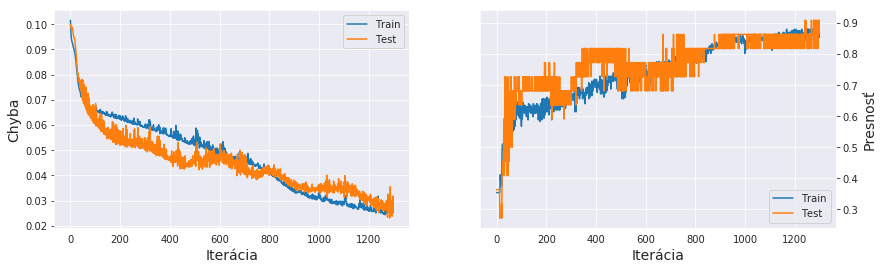

In [360]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Iterácia', fontsize=14)
axes[0].set_ylabel('Chyba', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper right')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Iterácia', fontsize=14)
axes[1].set_ylabel('Presnosť', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='lower right')

plt.show()